# Background
- Need data to fit to, but don't have any data yet (still missing some equipment)
- Generate some synthetic data (with noise?) and do a linear fit to find the constants.

# Imports

In [1]:
import numpy as np
import scipy.special
import scipy.optimize
import lmfit as lm
import pandas as pd
import pickle as pkl
import re
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

from hallprobecalib.hpcplots import spherical_scatter3d

In [2]:
# nicer plot formatting
def config_plots():
    #must run twice for some reason (glitch in Jupyter)
    for i in range(2):
        plt.rcParams['figure.figsize'] = [10, 8]
        plt.rcParams['axes.grid'] = True
        plt.rcParams['axes.axisbelow'] = True
        plt.rcParams['grid.linestyle'] = '--'
        plt.rcParams.update({'font.size': 18})
        
config_plots()

In [3]:
#plotdir = "/home/ckampa/Dropbox/assignments/inverse methods/final_project/paper/figures/"
plotdir = "/home/ckampa/Dropbox/assignments/w20/inverse methods/final_project/paper/figures/"

## Testing with OOP

In [4]:
class HallElement:
    def __init__(self, constant):
        self.constant = constant
    
    def getBPerp(self, voltage):
        return self.constant*voltage

In [5]:
e1 = HallElement(1e-6)

In [6]:
e1

In [7]:
e1.getBPerp(8e6)

8.0

In [8]:
class HallProbe:
    def __init__(self, constant_x, position_x, angle_x, constant_y, position_y, angle_y, constant_z, position_z, angle_z):
        he1 = HallElement(constant_x)

# Model Setup

In [9]:
k_max = 5 # |B| = 5 (Bergsma)
n_max = 2 # T = 2 (Bergsma)
l_max = 4 # from subtraction plots (Bergsma) to get to 5e-5.

In [10]:


#cklm = {f"c_{}_{}_{}": 0 for }

In [11]:
#cklm = {}
#dnlm = {}
params = {}

for k in range(k_max+1):
    for l in range(l_max+1):
        for m in range(0, l+1):
            #cklm[f"c_{k}_{l}_{m}"] = 0
            params[f"c_{k}_{l}_{m}"] = 0
for n in range(n_max+1):
    for l in range(l_max+1):
        for m in range(0, l+1):
            params[f"d_{n}_{l}_{m}"] = 0

In [12]:
params

{'c_0_0_0': 0,
 'c_0_1_0': 0,
 'c_0_1_1': 0,
 'c_0_2_0': 0,
 'c_0_2_1': 0,
 'c_0_2_2': 0,
 'c_0_3_0': 0,
 'c_0_3_1': 0,
 'c_0_3_2': 0,
 'c_0_3_3': 0,
 'c_0_4_0': 0,
 'c_0_4_1': 0,
 'c_0_4_2': 0,
 'c_0_4_3': 0,
 'c_0_4_4': 0,
 'c_1_0_0': 0,
 'c_1_1_0': 0,
 'c_1_1_1': 0,
 'c_1_2_0': 0,
 'c_1_2_1': 0,
 'c_1_2_2': 0,
 'c_1_3_0': 0,
 'c_1_3_1': 0,
 'c_1_3_2': 0,
 'c_1_3_3': 0,
 'c_1_4_0': 0,
 'c_1_4_1': 0,
 'c_1_4_2': 0,
 'c_1_4_3': 0,
 'c_1_4_4': 0,
 'c_2_0_0': 0,
 'c_2_1_0': 0,
 'c_2_1_1': 0,
 'c_2_2_0': 0,
 'c_2_2_1': 0,
 'c_2_2_2': 0,
 'c_2_3_0': 0,
 'c_2_3_1': 0,
 'c_2_3_2': 0,
 'c_2_3_3': 0,
 'c_2_4_0': 0,
 'c_2_4_1': 0,
 'c_2_4_2': 0,
 'c_2_4_3': 0,
 'c_2_4_4': 0,
 'c_3_0_0': 0,
 'c_3_1_0': 0,
 'c_3_1_1': 0,
 'c_3_2_0': 0,
 'c_3_2_1': 0,
 'c_3_2_2': 0,
 'c_3_3_0': 0,
 'c_3_3_1': 0,
 'c_3_3_2': 0,
 'c_3_3_3': 0,
 'c_3_4_0': 0,
 'c_3_4_1': 0,
 'c_3_4_2': 0,
 'c_3_4_3': 0,
 'c_3_4_4': 0,
 'c_4_0_0': 0,
 'c_4_1_0': 0,
 'c_4_1_1': 0,
 'c_4_2_0': 0,
 'c_4_2_1': 0,
 'c_4_2_2': 0,
 'c_4_3_0'

- Should get to 1% error with $\cos{\theta}$ contribution.
- 10^-3 error with cos (Y10) and planar Hall Effect (Y22)

In [13]:
# first order
first_order = ["_1_0$"]
second_order = ["_2_2$"]

In [14]:
print('First Order:')
for key, value in params.items():
    #print(key,value)
    if re.search(first_order[0], key):
        print(key)
        params[key] = 1e3 * (6-int(key[2]))/6
print('Second Order:')
for key, value in params.items():
    if re.search(second_order[0], key):
        print(key)
        params[key] = 1e2 * (6-int(key[2]))/6

First Order:
c_0_1_0
c_1_1_0
c_2_1_0
c_3_1_0
c_4_1_0
c_5_1_0
d_0_1_0
d_1_1_0
d_2_1_0
Second Order:
c_0_2_2
c_1_2_2
c_2_2_2
c_3_2_2
c_4_2_2
c_5_2_2
d_0_2_2
d_1_2_2
d_2_2_2


In [15]:
params

{'c_0_0_0': 0,
 'c_0_1_0': 1000.0,
 'c_0_1_1': 0,
 'c_0_2_0': 0,
 'c_0_2_1': 0,
 'c_0_2_2': 100.0,
 'c_0_3_0': 0,
 'c_0_3_1': 0,
 'c_0_3_2': 0,
 'c_0_3_3': 0,
 'c_0_4_0': 0,
 'c_0_4_1': 0,
 'c_0_4_2': 0,
 'c_0_4_3': 0,
 'c_0_4_4': 0,
 'c_1_0_0': 0,
 'c_1_1_0': 833.3333333333334,
 'c_1_1_1': 0,
 'c_1_2_0': 0,
 'c_1_2_1': 0,
 'c_1_2_2': 83.33333333333333,
 'c_1_3_0': 0,
 'c_1_3_1': 0,
 'c_1_3_2': 0,
 'c_1_3_3': 0,
 'c_1_4_0': 0,
 'c_1_4_1': 0,
 'c_1_4_2': 0,
 'c_1_4_3': 0,
 'c_1_4_4': 0,
 'c_2_0_0': 0,
 'c_2_1_0': 666.6666666666666,
 'c_2_1_1': 0,
 'c_2_2_0': 0,
 'c_2_2_1': 0,
 'c_2_2_2': 66.66666666666667,
 'c_2_3_0': 0,
 'c_2_3_1': 0,
 'c_2_3_2': 0,
 'c_2_3_3': 0,
 'c_2_4_0': 0,
 'c_2_4_1': 0,
 'c_2_4_2': 0,
 'c_2_4_3': 0,
 'c_2_4_4': 0,
 'c_3_0_0': 0,
 'c_3_1_0': 500.0,
 'c_3_1_1': 0,
 'c_3_2_0': 0,
 'c_3_2_1': 0,
 'c_3_2_2': 50.0,
 'c_3_3_0': 0,
 'c_3_3_1': 0,
 'c_3_3_2': 0,
 'c_3_3_3': 0,
 'c_3_4_0': 0,
 'c_3_4_1': 0,
 'c_3_4_2': 0,
 'c_3_4_3': 0,
 'c_3_4_4': 0,
 'c_4_0_0': 0,
 'c_4

In [16]:
np.polynomial.chebyshev.chebval([0,1,2,3,4], [0, 1, 0])

array([0., 1., 2., 3., 4.])

In [17]:
scipy.special.sph_harm(0, 1, 0, 0)

(0.4886025119029199+0j)

In [18]:
# (m, l, phi, theta)
scipy.special.sph_harm(2, 2, 0, np.pi/2)

(0.38627420202318963+0j)

In [19]:
thetas = np.linspace(0, np.pi, 10)
phis = np.linspace(0, 2*np.pi, 10)

In [20]:
np.real(scipy.special.sph_harm(0, 1, phis, thetas))

array([ 0.48860251,  0.45913617,  0.37429124,  0.24430126,  0.08484494,
       -0.08484494, -0.24430126, -0.37429124, -0.45913617, -0.48860251])

In [21]:
np.real(scipy.special.sph_harm(0, 1, 0, 0))

0.4886025119029199

In [22]:
def hallVoltage(Bmag,t,theta,phi, **params):#**params):
    V = np.zeros_like(Bmag)
    
    # extract k, n, and l parameters
    ks = set()
    ns = set()
    ls = set()
    for key, value in params.items():
        #if key[0] == "c":
        if "c" in key:
            ks.add(int(key[2]))#append(key[2])
            ls.add(int(key[4]))
        #if key[0] == "d":
        if "d" in key:
            ns.add(int(key[2]))

    ks = np.array(sorted(list(ks)))
    ns = np.array(sorted(list(ns)))
    ls = np.array(sorted(list(ls)))
    kmax = np.max(ks)
    nmax = np.max(ns)
    #print(ks, ns, ls)
    #print(kmax, nmax)
    
    for k in ks:
        cs_k = np.zeros(kmax+1)
        cs_k[k] = 1
        Tk_B = np.polynomial.chebyshev.chebval(Bmag, cs_k)
        for n in ns:
            cs_t = np.zeros(nmax+1)
            cs_t[n] = 1
            Tn_t = np.polynomial.chebyshev.chebval(t, cs_t)
            for l in ls:
                for m in range(l+1):
                    cklm = params[f"c_{k}_{l}_{m}"]
                    dnlm = params[f"d_{n}_{l}_{m}"]
                    Ylm = np.real(scipy.special.sph_harm(m, l, phi, theta))
                    V += cklm*Tk_B*dnlm*Tn_t*Ylm
    
    return V

In [23]:
N = 180 # num theta angles
M = 180 # num phi angles
Bmags = np.ones(N*M) # Tesla
#ts = 20 * np.ones(N*M) # deg C
ts = np.linspace(20, 23, N*M)# deg C
thetas = np.linspace(0, np.pi, N)
phis = np.linspace(0, 2*np.pi, M)

PH, TH = np.meshgrid(phis, thetas)
TH = TH.flatten()
PH = PH.flatten()

In [24]:
V = hallVoltage(Bmags, ts, TH, PH, **params)

In [25]:
V

array([ 9.41129872e+08,  9.41138449e+08,  9.41147026e+08, ...,
       -1.23952417e+09, -1.23953401e+09, -1.23954386e+09])

In [26]:
PH = pd.Series(np.degrees(PH))
TH = pd.Series(np.degrees(TH))
V = pd.Series(V)

In [32]:
#spherical_scatter3d(PH, TH, V)

In [33]:
m = PH == 0

In [34]:
len(TH[m])

180

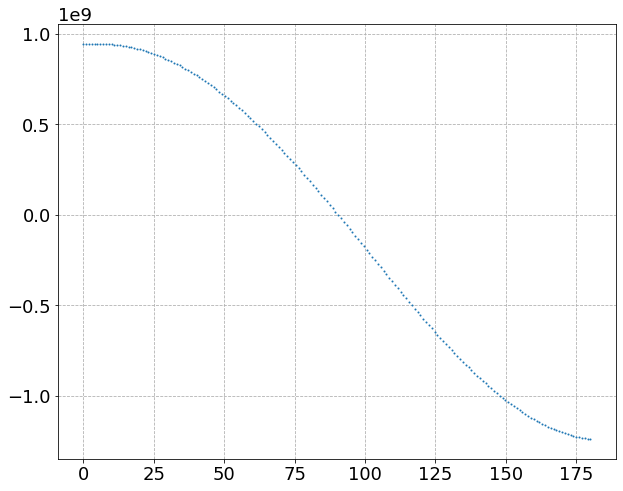

In [30]:
plt.scatter(TH[m], V[m], s=1)

In [31]:
ks = set()#[]
ns = set()#[]
ls = set()#[]
for key, value in params.items():
    #if key[0] == "c":
    if "c" in key:
        ks.add(int(key[2]))#append(key[2])
        ls.add(int(key[4]))
    #if key[0] == "d":
    if "d" in key:
        ns.add(int(key[2]))
    
ks = np.array(list(ks))
ns = np.array(list(ns))
ls = np.array(list(ls))

In [ ]:
ks, ns, ls

In [ ]:
for k in ks:
    for l in ls:
        for m in

In [ ]:
params

In [ ]:
text = "c_0_1_0_0"

x = re.search('_1_0$', text)

In [ ]:
x

In [ ]:
if x:
    print("mathed!")

In [ ]:
Ts = [1, x]
for n in ns[1:]:
    Ts.append(2)


In [ ]:
Ts = [1, x]

for n in range(2, 10):
    Ts.append(2*x*Ts[-1] - Ts[-2])

In [ ]:
180*180

# Least-Squares Solutions

## lmfit

In [ ]:
model = lm.Model(hallVoltage, independent_vars=['Bmag','t','theta','phi'])

In [ ]:
model

In [ ]:
params_lm = lm.Parameters()

# extract k, n, and l parameters
ks = set()
ns = set()
ls = set()
for key, value in params.items():
    #if key[0] == "c":
    if "c" in key:
        ks.add(int(key[2]))#append(key[2])
        ls.add(int(key[4]))
    #if key[0] == "d":
    if "d" in key:
        ns.add(int(key[2]))

ks = np.array(sorted(list(ks)))
ns = np.array(sorted(list(ns)))
ls = np.array(sorted(list(ls)))
kmax = np.max(ks)
nmax = np.max(ns)
#print(ks, ns, ls)
#print(kmax, nmax)

for k in ks:
    #cs_k = np.zeros(kmax+1)
    #cs_k[k] = 1
    #Tk_B = np.polynomial.chebyshev.chebval(Bmag, cs_k)
    for n in ns:
        #cs_t = np.zeros(nmax+1)
        #cs_t[n] = 1
        #Tn_t = np.polynomial.chebyshev.chebval(t, cs_t)
        for l in ls:
            for m in range(l+1):
                #cklm = params[f"c_{k}_{l}_{m}"]
                #dnlm = params[f"d_{n}_{l}_{m}"]
                #Ylm = np.real(scipy.special.sph_harm(m, l, phi, theta))
                #V += cklm*Tk_B*dnlm*Tn_t*Ylm
                params_lm.add(f"c_{k}_{l}_{m}", value=0, min=0)
                params_lm.add(f"d_{n}_{l}_{m}", value=0, min=0)

In [ ]:
params_lm

In [ ]:
result = model.fit(V,Bmag=Bmags,t=ts,theta=TH,phi=PH, params=params_lm)

In [ ]:
print(result.fit_report())

In [ ]:
params

## Matrix Formulation

In [ ]:
len(params)

In [ ]:
N = 180*180
M = len(params)

In [ ]:
G = np.random.rand(N,M)

In [ ]:
G

In [ ]:
G.shape

In [ ]:
(np.linalg.inv(G.T @ G) @ G.T).shape

In [ ]:
# data
V

In [ ]:
V.shape

In [ ]:
m = (np.linalg.inv(G.T @ G) @ G.T) @ V

In [ ]:
m

# Limited Model + Least Squares

In [ ]:
Nphi, Ntheta, NB, Nt = (18, 10, 4, 3)#(360, 181, 4, 3)#(18, 9, 4, 3)
phis = np.linspace(0, 2*np.pi - 2*np.pi/Nphi, Nphi) # every 20 deg
#thetas = np.linspace(0, np.pi - np.pi/Ntheta, Ntheta) # every 20 deg
thetas = np.linspace(0, np.pi, Ntheta) # every 20 deg
Bs = np.linspace(0.5, 1.25, NB)
ts = np.linspace(21, 25, Nt)
#phis = np.linspace(0, 2*np.pi, Nphi) # every 20 deg
#thetas = 

In [ ]:
np.degrees(thetas)

In [ ]:
B, Te, Th, Ph = np.meshgrid(Bs, ts, thetas, phis)
B = B.flatten()
Te = Te.flatten()
Th = Th.flatten()
Ph = Ph.flatten()

In [ ]:
Te.shape

In [ ]:
df = pd.DataFrame({"B":B, "Temp":Te, "Theta": Th, "Phi": Ph})

In [ ]:
df["Theta_deg"] = np.degrees(df.Theta)
df["Phi_deg"] = np.degrees(df.Phi)

In [ ]:
df.head()

In [ ]:
params_knlm = ["1110", "1122", "1210", "1222", "2110", "2122",
               "2210", "2222", "3110", "3122", "3210", "3222",]

In [ ]:
base = 1e5#6
params_vals = [base, base*1e-2, base*1e-2, base*1e-3, base*1e-2, base*1e-3,
               base*1e-3, base*1e-4, base*1e-3, base*1e-4, base*1e-4, base*1e-5]

In [ ]:
params = {f"c_{p}":v for p,v in zip(params_knlm, params_vals)}

In [ ]:
params

In [ ]:
len(params)

In [ ]:
def V_forward(Bs, ts, thetas, phis, **params):
    #V = 0.
    ks = list(set(int(i[2]) for i in params.keys()))
    ns = list(set(int(i[3]) for i in params.keys()))
    kmax = np.max(np.array(ks))
    nmax = np.max(np.array(ns))
    lms = list(set((i[4:]) for i in params.keys()))
    Ylms = {}
    for lm_ in lms:
        l, m = [int(i) for i in list(lm_)]
        Ylms[lm_] = np.real(scipy.special.sph_harm(m, l, phis, thetas))
    cs_B = [np.zeros_like(Bs)] # want T_0(B) to be 0
    for k in ks:
        cs = np.zeros_like(Bs) # 0
        for n in ns:
            cs_t = np.zeros(nmax+1)
            cs_t[n] = 1
            Tn_t = np.polynomial.chebyshev.chebval(ts, cs_t)
            params_ylms = np.zeros_like(Bs)
            for lm_ in lms:
                params_ylms += params[f"c_{k}{n}{lm_}"] * Ylms[lm_]
            cs += Tn_t * params_ylms
        cs_B.append(cs)
    
    cs_B = np.array(cs_B)#.T
    #print(cs_B)
    V = np.polynomial.chebyshev.chebval(Bs, cs_B)
    
    '''
    for p, v in params.items():
        k = p[2]
        l = p[3]
        m = p[4]
        n = p[5]
        cs_k = np.zeros(kmax+1)
        cs_k[k] = 1
        Tk_B = np.polynomial.chebyshev.chebval(Bs, k)
        Tn_t = np.polynomial.chebyshev.chebval(ts, t)
        Ylm = np.real(scipy.special.sph_harm(m, l, phis, thetas))
        V += v * Tk_B * Tn_t * Ylm
    '''
    return V

In [ ]:
df["V_truth"] = V_forward(df.B, df.Temp, df.Theta, df.Phi, **params)

In [ ]:
df["V_truth"]

In [ ]:
# plot

In [ ]:
df_ = df.query("B == 1.0 & Temp == 21.0")

In [ ]:
df_

In [ ]:
fig = spherical_scatter3d(df.Phi_deg, df.Theta_deg, df.V_truth)

In [ ]:
fig = spherical_scatter3d(df_.Phi_deg, df_.Theta_deg, df_.V_truth)

In [ ]:
df_ph = df_.query("Phi == 0")

In [ ]:
plt.scatter(df_ph.Theta_deg, df_ph.V_truth, s=15);

In [ ]:
df_phth = df.query("Phi == 0 & Theta == 0")

In [ ]:
df_phth

In [ ]:
px.scatter(df_phth, x="Temp", y="V_truth", color="B")

In [ ]:
plt.scatter(df_phth.B, df_phth.V_truth, s=15);

In [ ]:
def G_j(Bs, ts, thetas, phis, k, n, l, m):
    # jth column of G
    cs_k = np.zeros(k+1)
    cs_k[-1] = 1
    cs_n = np.zeros(n+1)
    cs_n[-1] = 1
    Tk = np.polynomial.chebyshev.chebval(Bs, cs_k)
    Tn = np.polynomial.chebyshev.chebval(ts, cs_n)
    Ylm = np.real(scipy.special.sph_harm(m, l, phis, thetas))
    
    return Tk * Tn * Ylm

In [ ]:
ks = list(set(int(i[2]) for i in params.keys()))
ns = list(set(int(i[3]) for i in params.keys()))
kmax = np.max(np.array(ks))
nmax = np.max(np.array(ns))
lms = list(set((i[4:]) for i in params.keys()))

In [ ]:
ks

In [ ]:
ns

In [ ]:
lms

In [ ]:
js = []
for k in ks:
    for n in ns:
        for lm_ in lms:
            js.append({"k":k, "n":n, "l":int(lm_[0]), "m":int(lm_[1])})

In [ ]:
js

In [ ]:
js[0]

In [ ]:
G = []
for j in js:
    G.append(G_j(df.B, df.Temp, df.Theta, df.Phi, **j).values)

In [ ]:
np.array(G).T.shape

In [ ]:
G = np.array(G).T

In [ ]:
G

In [ ]:
# data vector
d = df.V_truth.values

In [ ]:
m = np.linalg.inv(G.T @ G) @ G.T @ d

In [ ]:
m

In [ ]:
m_dict = {}
i = 0
for k in ks:
    for n in ns:
        for lm_ in lms:
            m_dict[f"c_{k}{n}{lm_[0]}{lm_[1]}"] = m[i]
            i += 1

In [ ]:
m_dict

In [ ]:
params

In [ ]:
df["V_syn"] = V_forward(df.B, df.Temp, df.Theta, df.Phi, **m_dict)

In [ ]:
df["res"] = df.V_truth - df.V_syn
df["res_rel"] = df.res / df.V_truth

In [ ]:
plt.hist(df["res"], bins=50);
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

In [ ]:
plt.hist(df["res_rel"], bins=50);
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

In [ ]:
cols = ["B", "Temp", "Theta", "Phi", "V_truth", "V_syn", "res", "res_rel"]

In [ ]:
px.scatter_matrix(df[cols])

# All Together

In [5]:
def V_forward(Bs, ts, thetas, phis, **params):
    '''
    Parameters: 
    length-N numpy.arrays -- Bs (magnetic field), 
    ts (temperature), thetas (polar), phis (azimuthal)
    dictionary -- params where key is of form "c_knlm"
    and value is a float
    
    Return: V (Hall voltage), a length-N numpy.array
    '''
    # first determine ks, ns, and lms in use
    ks = list(set(int(i[2]) for i in params.keys()))
    ns = list(set(int(i[3]) for i in params.keys()))
    kmax = np.max(np.array(ks))
    nmax = np.max(np.array(ns))
    lms = list(set((i[4:]) for i in params.keys()))
    # loop through each lm and split into l and m
    # to store needed spherical harmonics in a dict
    Ylms = {}
    for lm_ in lms:
        l, m = [int(i) for i in list(lm_)]
        # store spherical harmonic for each lm
        Ylms[lm_] = np.real(scipy.special.sph_harm(m, l, phis, thetas))
    
    # initialize coefficient array for Chebyshev (B)
    # starting with T_0(B) = 0 for all N data points
    cs_B = [np.zeros_like(Bs)]
    # loop through all terms in model
    #### B ####
    for k in ks:
        # initialize coefficients to add to cs_B as zero
        cs = np.zeros_like(Bs)
        #### t ####
        for n in ns:
            # initialize another coeff array for Chebyshev (t)
            cs_t = np.zeros(nmax+1)
            # set the term we care about (n) to 1
            # and keep the rest = 0
            cs_t[n] = 1
            # generate Chebyshev (t)
            Tn_t = np.polynomial.chebyshev.chebval(ts, cs_t)
            
            # prepare array to store c_knlm * Y_lm
            params_ylms = np.zeros_like(Bs)
            #### theta, phi ####
            for lm_ in lms:
                params_ylms += params[f"c_{k}{n}{lm_}"] * Ylms[lm_]
            # add to cs (iteratively) as: T_n(t) * c_knlm * Y_lm
            cs += Tn_t * params_ylms
        # add completed cs array into cs_B
        cs_B.append(cs)
    cs_B = np.array(cs_B)
    # calculate V from all prepared terms
    V = np.polynomial.chebyshev.chebval(Bs, cs_B)
    return V

In [6]:
def gen_data(Bs, ts, thetas, phis, sigma):
    '''
    Parameters: 
    length-N numpy.arrays -- Bs (magnetic field), 
    ts (temperature), thetas (polar), phis (azimuthal)
    float -- sigma (noise standard deviation)
    
    Return: df, pandas.DataFrame
    '''
    # create meshgrid for all input independent variables
    B, Te, Th, Ph = np.meshgrid(Bs, ts, thetas, phis)
    # flatten all to 1D arrays
    B = B.flatten()
    Te = Te.flatten()
    Th = Th.flatten()
    Ph = Ph.flatten()
    
    # create pandas.DataFrame to store information from each data point
    df = pd.DataFrame({"B":B, "Temp":Te, "Theta": Th, "Phi": Ph})
    # add columns for angles in degrees for convenience
    df["Theta_deg"] = np.degrees(df.Theta)
    df["Phi_deg"] = np.degrees(df.Phi)
    # use forward function to generate voltage data and store in new column
    df["V_obs"] = V_forward(df.B, df.Temp, df.Theta, df.Phi, **params)
    # inject noise
    df["V_obs"] = df["V_obs"] + np.random.normal(loc=0.0, scale=sigma, size=len(df))
    # set sigma as a column
    df["sigma_V"] = sigma
    
    return df

In [7]:
def G_j(Bs, ts, thetas, phis, k, n, l, m):
    '''
    Parameters: 
    length-N numpy.arrays -- Bs (magnetic field), 
    ts (temperature), thetas (polar), phis (azimuthal)
    int -- k, n, l, m (parameters needed in that column)
    
    Return: length-N numpy.array -- G_j (column j of G matrix)
    '''
    # initialize Chebyshev coefficients
    cs_k = np.zeros(k+1)
    cs_k[-1] = 1
    cs_n = np.zeros(n+1)
    cs_n[-1] = 1
    # calculate Chebyshev and Spherical
    Tk = np.polynomial.chebyshev.chebval(Bs, cs_k)
    Tn = np.polynomial.chebyshev.chebval(ts, cs_n)
    Ylm = np.real(scipy.special.sph_harm(m, l, phis, thetas))
    return Tk * Tn * Ylm

In [8]:
def hall_cal_least_squares(df):
    '''
    Parameters: 
    pandas.DataFrame -- df
    
    Return: 
    pandas.DataFrame -- df
    dictionary -- m_dict (parameters with names)
    length-M numpy.array -- m (parameters)
    M x M numpy.ndarray -- m_cov (parameters covariance matrix)
    '''
    # determine which parameters are in parameter set
    ks = list(set(int(i[2]) for i in params.keys()))
    ns = list(set(int(i[3]) for i in params.keys()))
    kmax = np.max(np.array(ks))
    nmax = np.max(np.array(ns))
    lms = list(set((i[4:]) for i in params.keys()))

    # generate G matrix
    # determine which knlm to use for each column of G
    js = []
    for k in ks:
        for n in ns:
            for lm_ in lms:
                js.append({"k":k, "n":n, "l":int(lm_[0]), "m":int(lm_[1])})
    # generate G matrix one column at a time
    # usig G_j function
    G = []
    for j in js:
        G.append(G_j(df.B, df.Temp, df.Theta, df.Phi, **j).values)
    # combine to full G matrix
    G = np.array(G).T

    # data vector
    d = df.V_obs.values
    # least squares solution
    GtG_inv = np.linalg.inv(G.T @ G)
    m = GtG_inv @ G.T @ d
    # calculate m_cov
    m_cov = df.sigma_V.iloc[0]**2 * GtG_inv
    
    # construct m_dict
    m_dict = {}
    i = 0
    for k in ks:
        for n in ns:
            for lm_ in lms:
                m_dict[f"c_{k}{n}{lm_[0]}{lm_[1]}"] = m[i]
                i += 1

    # generate synthetic data from model vector m after least squares solution
    df["V_syn"] = V_forward(df.B, df.Temp, df.Theta, df.Phi, **m_dict)
    # calculatate residual and relative residual
    df["res"] = df.V_obs - df.V_syn
    df["res_rel"] = df.res / df.V_obs
    
    return df, m_dict, m, m_cov

# For Paper

## Construct Parameters

In [9]:
# parameter keys
params_knlm = ["1110", "1122", "1210", "1222", "2110", "2122",
               "2210", "2222", "3110", "3122", "3210", "3222",]
base = 1e5
# pick realistic values
params_vals = [base, base*1e-2, base*1e-2, base*1e-3, base*1e-2, base*1e-3,
               base*1e-3, base*1e-4, base*1e-3, base*1e-4, base*1e-4, base*1e-5]
scale_factors = list(1 + np.random.normal(scale=1e-1, size=len(params_vals)))
params_vals = [p*sf for p, sf in zip(params_vals, scale_factors)]
# generate dictionary
params = {f"c_{p}":v for p,v in zip(params_knlm, params_vals)}

In [10]:
params

{'c_1110': 123654.49962814417,
 'c_1122': 842.454841279633,
 'c_1210': 1067.2833900826565,
 'c_1222': 95.65245367005953,
 'c_2110': 968.9991047380223,
 'c_2122': 97.89987294820975,
 'c_2210': 92.51734943543316,
 'c_2222': 9.915202881587499,
 'c_3110': 99.53440659519957,
 'c_3122': 10.492094629125951,
 'c_3210': 8.580117890672687,
 'c_3222': 0.8614998601333107}

In [11]:
ks = [int(p[0]) for p in params_knlm]
ns = [int(p[1]) for p in params_knlm]
ls = [int(p[2]) for p in params_knlm]
ms = [int(p[3]) for p in params_knlm]

In [12]:
df_params = pd.DataFrame({'k':ks, 'n': ns, 'l': ls, 'm': ms, 'val': params_vals})

In [13]:
df_params

,k,n,l,m,val
0,1,1,1,0,123654.499628
1,1,1,2,2,842.454841
2,1,2,1,0,1067.283390
3,1,2,2,2,95.652454
4,2,1,1,0,968.999105
5,2,1,2,2,97.899873
6,2,2,1,0,92.517349
7,2,2,2,2,9.915203
8,3,1,1,0,99.534407
9,3,1,2,2,10.492095


In [14]:
#df_params.to_pickle('fake_data/hall_voltage_01_params.p')
#df_params.to_pickle('/home/ckampa/data/pickles/hallcalib/fake_data/hall_voltage_02_params.p')
df_params.to_pickle('/home/ckampa/data/pickles/hallcalib/fake_data/hall_voltage_04_params.p')

In [15]:
df_params.max()

k           3.000000
n           2.000000
l           2.000000
m           2.000000
val    123654.499628
dtype: float64

## Construct Params (one non-zero term)

In [50]:
# parameter keys
params_knlm = ["1110"]#, "1122", "1210", "1222", "2110", "2122",
               #"2210", "2222", "3110", "3122", "3210", "3222",]
base = 1e5
# pick realistic values
params_vals = [base]#, base*1e-2, base*1e-2, base*1e-3, base*1e-2, base*1e-3,
               #base*1e-3, base*1e-4, base*1e-3, base*1e-4, base*1e-4, base*1e-5]
scale_factors = list(1 + np.random.normal(scale=1e-1, size=len(params_vals)))
params_vals = [p*sf for p, sf in zip(params_vals, scale_factors)]
# generate dictionary
params = {f"c_{p}":v for p,v in zip(params_knlm, params_vals)}

In [51]:
params

{'c_1110': 96604.63268777147}

In [52]:
ks = [int(p[0]) for p in params_knlm]
ns = [int(p[1]) for p in params_knlm]
ls = [int(p[2]) for p in params_knlm]
ms = [int(p[3]) for p in params_knlm]

In [53]:
df_params = pd.DataFrame({'k':ks, 'n': ns, 'l': ls, 'm': ms, 'val': params_vals})

In [54]:
df_params

,k,n,l,m,val
0,1,1,1,0,96604.632688


In [55]:
#df_params.to_pickle('fake_data/hall_voltage_01_params.p')
#df_params.to_pickle('/home/ckampa/data/pickles/hallcalib/fake_data/hall_voltage_02_params.p')
df_params.to_pickle('/home/ckampa/data/pickles/hallcalib/fake_data/hall_voltage_03_params.p')

In [56]:
df_params.max()

k          1.000000
n          1.000000
l          1.000000
m          0.000000
val    96604.632688
dtype: float64

## Generate Validation Data

In [57]:
# generate starting conditions
#Nphi, Ntheta, NB, Nt = (360, 181, 4, 3)
Nphi, Ntheta, NB, Nt = (360, 361, 4, 3)
phis = np.linspace(0, 2*np.pi - 2*np.pi/Nphi, Nphi)
thetas = np.linspace(0, np.pi, Ntheta)
Bs = np.linspace(0.5, 1.25, NB)
ts = np.linspace(21, 25, Nt)
sigma = 25. # 0.

# call forward data generation function and store in dataframe
df = gen_data(Bs, ts, thetas, phis, sigma)

In [17]:
# MORE |B|, t, less theta, phi
# generate starting conditions
Nphi, Ntheta, NB, Nt = (180, 91, 8, 6)
#Nphi, Ntheta, NB, Nt = (360, 361, 4, 3)
phis = np.linspace(0, 2*np.pi - 2*np.pi/Nphi, Nphi)
thetas = np.linspace(0, np.pi, Ntheta)
Bs = np.linspace(0.5, 1.25, NB)
ts = np.linspace(21, 25, Nt)
sigma = 50. # 0.

# call forward data generation function and store in dataframe
df = gen_data(Bs, ts, thetas, phis, sigma)

In [18]:
df

,B,Temp,Theta,Phi,Theta_deg,Phi_deg,V_obs,sigma_V
0,0.50,21.0,0.000000,0.000000,0.0,0.0,8.346260e+05,50.0
1,0.50,21.0,0.000000,0.034907,0.0,2.0,8.345115e+05,50.0
2,0.50,21.0,0.000000,0.069813,0.0,4.0,8.345252e+05,50.0
3,0.50,21.0,0.000000,0.104720,0.0,6.0,8.344838e+05,50.0
4,0.50,21.0,0.000000,0.139626,0.0,8.0,8.345347e+05,50.0
...,...,...,...,...,...,...,...,...
786235,1.25,25.0,3.141593,6.108652,180.0,350.0,-2.873566e+06,50.0
786236,1.25,25.0,3.141593,6.143559,180.0,352.0,-2.873587e+06,50.0
786237,1.25,25.0,3.141593,6.178466,180.0,354.0,-2.873593e+06,50.0
786238,1.25,25.0,3.141593,6.213372,180.0,356.0,-2.873531e+06,50.0


In [19]:
#df.to_pickle('fake_data/hall_voltage_01_data.p')
#df.to_pickle('/home/ckampa/data/pickles/hallcalib/fake_data/hall_voltage_02_data.p')
#df.to_pickle('/home/ckampa/data/pickles/hallcalib/fake_data/hall_voltage_03_data.p')
df.to_pickle('/home/ckampa/data/pickles/hallcalib/fake_data/hall_voltage_04_data.p')

## Filter Validation Data for Two Tests

'n, bins, patches = plt.hist(df["res_rel_FNAL"], bins=100, alpha=0.7, histtype=\'step\', linewidth=2);\nplt.hist(df["res_rel_full"], bins=bins, alpha=0.7, histtype=\'step\', linewidth=2);# bins=100, alpha=0.5);\nplt.ticklabel_format(axis="x", style="sci", scilimits=(0,0));\nplt.yscale(\'log\');\n'

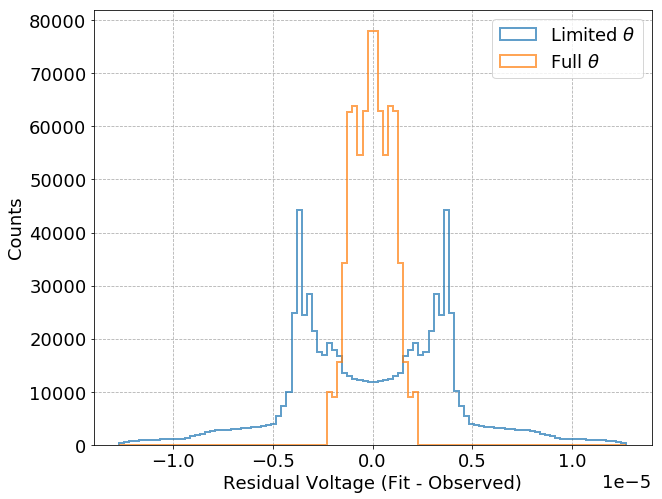

In [23]:
# all theta
df_full = df[np.isin(df.Theta_deg, df.Theta_deg.unique()[::4]) \
             & np.isin(df.Phi_deg, df.Phi_deg.unique()[::4])]
df_full, m_dict, m, m_cov = hall_cal_least_squares(df_full)

df["V_syn_full"] = V_forward(df.B, df.Temp, df.Theta, df.Phi, **m_dict)
df["res_full"] = df.V_obs - df.V_syn_full
df["res_rel_full"] = df.res_full / df.V_obs

# limited theta
max_theta_deg = 15 # deg
max_theta = np.radians(max_theta_deg)

df_FNAL = df[np.isin(df.Theta_deg, df.Theta_deg.unique()[::4]) \
             & np.isin(df.Phi_deg, df.Phi_deg.unique()[::4])]

df_FNAL = df_FNAL.query(f"Theta <= {max_theta} or Theta >= {np.pi - max_theta}")

cols = ["B", "Temp", "Theta", "Phi", "Theta_deg", "Phi_deg", "V_obs", "sigma_V"]

df_FNAL = df_FNAL[cols]
df_FNAL, m_dict, m, m_cov = hall_cal_least_squares(df_FNAL)

df["V_syn_FNAL"] = V_forward(df.B, df.Temp, df.Theta, df.Phi, **m_dict)
df["res_FNAL"] = df.V_obs - df.V_syn_FNAL
df["res_rel_FNAL"] = df.res_FNAL / df.V_obs

# residual plot
n, bins, patches = plt.hist(df["res_FNAL"], bins=100, alpha=0.7, histtype='step',\
                            linewidth=2, label=r"Limited $\theta$");
plt.hist(df["res_full"], bins=bins, alpha=0.7, histtype='step', linewidth=2, label=r"Full $\theta$");
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0));

plt.xlabel("Residual Voltage (Fit - Observed)")
plt.ylabel("Counts")
plt.legend()

plt.savefig(plotdir+"res_hist.pdf")
plt.savefig(plotdir+"res_hist.png");

## Full Dataset

In [17]:
# parameter keys
params_knlm = ["1110", "1122", "1210", "1222", "2110", "2122",
               "2210", "2222", "3110", "3122", "3210", "3222",]
base = 1e5
# pick realistic values
params_vals = [base, base*1e-2, base*1e-2, base*1e-3, base*1e-2, base*1e-3,
               base*1e-3, base*1e-4, base*1e-3, base*1e-4, base*1e-4, base*1e-5]
# generate dictionary
params = {f"c_{p}":v for p,v in zip(params_knlm, params_vals)}

In [14]:
# generate starting conditions
Nphi, Ntheta, NB, Nt = (360, 181, 4, 3)
phis = np.linspace(0, 2*np.pi - 2*np.pi/Nphi, Nphi)
thetas = np.linspace(0, np.pi, Ntheta)
Bs = np.linspace(0.5, 1.25, NB)
ts = np.linspace(21, 25, Nt)
sigma = 0.

In [15]:
# call forward data generation function and store in dataframe
df = gen_data(Bs, ts, thetas, phis, sigma)

In [16]:
df.head()

,B,Temp,Theta,Phi,Theta_deg,Phi_deg,V_obs,sigma_V
0,0.5,21.0,0.0,0.000000,0.0,0.0,696278.123562,0.0
1,0.5,21.0,0.0,0.017453,0.0,1.0,696278.123562,0.0
2,0.5,21.0,0.0,0.034907,0.0,2.0,696278.123562,0.0
3,0.5,21.0,0.0,0.052360,0.0,3.0,696278.123562,0.0
4,0.5,21.0,0.0,0.069813,0.0,4.0,696278.123562,0.0


In [ ]:
len(df)

In [ ]:
# take 1/4 of all data
df_full = df[np.isin(df.Theta_deg, df.Theta_deg.unique()[::4]) & np.isin(df.Phi_deg, df.Phi_deg.unique()[::4])]

In [ ]:
len(df_full)

In [ ]:
len(df_full) / len(df)

In [ ]:
df_full, m_dict, m, m_cov = hall_cal_least_squares(df_full)

In [ ]:
df["V_syn_full"] = V_forward(df.B, df.Temp, df.Theta, df.Phi, **m_dict)
df["res_full"] = df.V_obs - df.V_syn_full
df["res_rel_full"] = df.res_full / df.V_obs

In [ ]:
#m_cov

In [ ]:
m

In [ ]:
m_dict

In [ ]:
params

In [ ]:
# param uncertainties
np.sqrt(np.diag(m_cov))

In [ ]:
plt.hist(df_full["res"], bins=50);
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

In [ ]:
plt.hist(df_full["res_rel"], bins=50);
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yscale('log');

In [ ]:
df_full[df_full["res_rel"] == df_full["res_rel"].min()]

In [ ]:
cols = ["B", "Temp", "Theta", "Phi", "V_obs", "V_syn", "res", "res_rel"]

In [ ]:
# takes too long
#px.scatter_matrix(df_full[cols])

## FNAL Dataset

In [ ]:
## DONT CHANGE N from above
#Nphi, Ntheta, NB, Nt = (18, 10, 4, 3)#(360, 181, 4, 3)#(18, 9, 4, 3)
phis = np.linspace(0, 2*np.pi - 2*np.pi/Nphi, Nphi) # every 20 deg
#thetas = np.linspace(0, np.pi - np.pi/Ntheta, Ntheta) # every 20 deg
thetas = np.linspace(0, np.pi, Ntheta) # every 20 deg
max_theta_deg = 15 # deg
max_theta = np.radians(max_theta_deg)
tmask = (thetas <= max_theta) | (thetas >= np.pi - max_theta)
thetas = thetas[tmask]
Bs = np.linspace(0.5, 1.25, NB)
ts = np.linspace(21, 25, Nt)
#phis = np.linspace(0, 2*np.pi, Nphi) # every 20 deg
#thetas = 

In [ ]:
#df_FNAL = gen_data(Bs, ts, thetas, phis, sigma)

In [ ]:
# take from validation
df_FNAL = df[np.isin(df.Theta_deg, df.Theta_deg.unique()[::4]) & np.isin(df.Phi_deg, df.Phi_deg.unique()[::4])]

In [ ]:
df_FNAL = df_FNAL.query(f"Theta <= {max_theta} or Theta >= {np.pi - max_theta}")

In [ ]:
cols = ["B", "Temp", "Theta", "Phi", "Theta_deg", "Phi_deg", "V_obs", "sigma_V"]

In [ ]:
df_FNAL = df_FNAL[cols]

In [ ]:
df_FNAL.head()

In [ ]:
len(df_FNAL)

In [ ]:
df_FNAL, m_dict, m, m_cov = hall_cal_least_squares(df_FNAL)

In [ ]:
df["V_syn_FNAL"] = V_forward(df.B, df.Temp, df.Theta, df.Phi, **m_dict)
df["res_FNAL"] = df.V_obs - df.V_syn_FNAL
df["res_rel_FNAL"] = df.res_FNAL / df.V_obs

In [ ]:
#m_cov

In [ ]:
m

In [ ]:
m_dict

In [ ]:
params

In [ ]:
# param uncertainties
np.sqrt(np.diag(m_cov))

In [ ]:
plt.hist(df_FNAL["res"], bins=50);
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

In [ ]:
plt.hist(df_FNAL["res_rel"], bins=50);
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yscale('log');

In [ ]:
df_FNAL[df_FNAL["res_rel"] == df_FNAL["res_rel"].min()]

In [ ]:
cols = ["B", "Temp", "Theta", "Phi", "V_obs", "V_syn", "res", "res_rel"]

In [ ]:
px.scatter_matrix(df_FNAL[cols])

## Comparison

In [ ]:
n, bins, patches = plt.hist(df["res_FNAL"], bins=100, alpha=0.7, histtype='step', linewidth=2);
plt.hist(df["res_full"], bins=bins, alpha=0.7, histtype='step', linewidth=2);# bins=100, alpha=0.5);
#plt.hist(df["res_full"], bins=100, alpha=0.7, histtype='step', linewidth=2);# bins=100, alpha=0.5);
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0));

In [ ]:
df["res_full"].describe()

In [ ]:
df["res_FNAL"].describe()

In [ ]:
n, bins, patches = plt.hist(df["res_rel_FNAL"], bins=100, alpha=0.7, histtype='step', linewidth=2);
plt.hist(df["res_rel_full"], bins=bins, alpha=0.7, histtype='step', linewidth=2);# bins=100, alpha=0.5);
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0));
plt.yscale('log');

In [ ]:
df["res_rel_full"].describe()

In [ ]:
df["res_rel_FNAL"].describe()

## Comparing Different Max Theta

In [39]:
params_knlm = ["1110", "1122", "1210", "1222", "2110", "2122",
               "2210", "2222", "3110", "3122", "3210", "3222",]
base = 1e5#6
params_vals = [base, base*1e-2, base*1e-2, base*1e-3, base*1e-2, base*1e-3,
               base*1e-3, base*1e-4, base*1e-3, base*1e-4, base*1e-4, base*1e-5]
params = {f"c_{p}":v for p,v in zip(params_knlm, params_vals)}

In [52]:
Nphi, Ntheta, NB, Nt = (360, 181, 4, 3)#(18, 10, 4, 3)#(360, 181, 4, 3)#(18, 9, 4, 3)
phis = np.linspace(0, 2*np.pi - 2*np.pi/Nphi, Nphi) # every 20 deg
#thetas = np.linspace(0, np.pi - np.pi/Ntheta, Ntheta) # every 20 deg
thetas = np.linspace(0, np.pi, Ntheta) # every 20 deg
Bs = np.linspace(0.5, 1.25, NB)
ts = np.linspace(21, 25, Nt)
#phis = np.linspace(0, 2*np.pi, Nphi) # every 20 deg
#thetas = 
sigma = 120. # 0.

In [53]:
df = gen_data(Bs, ts, thetas, phis, sigma)

In [54]:
#max_thetas_deg = [5, 15, 25, 30, 60, 89, 180]
max_thetas_deg = [5, 15, 30, 60, 90]
max_thetas_deg_string = [str(t) for t in max_thetas_deg]
max_thetas = [np.radians(t) for t in max_thetas_deg]

In [55]:
max_points = 1000

In [56]:
len(df) / max_points

781.92

In [57]:
plot = False

for half, hs in zip([False, True], ["", "_half"]):
    for max_theta, tstr in zip(max_thetas, max_thetas_deg_string):
        # get proper thetas
        #thetas = np.linspace(0, np.pi, Ntheta) # every 20 deg
        #if half:
        #    tmask = (thetas <= max_theta)# | (thetas >= np.pi - max_theta)
        #else:
        #    tmask = (thetas <= max_theta) | (thetas >= np.pi - max_theta)
        #thetas = thetas[tmask]

        # take from validation
        df_ = df[np.isin(df.Theta_deg, df.Theta_deg.unique()[::4]) & np.isin(df.Phi_deg, df.Phi_deg.unique()[::4])]
        if half:
            df_ = df_.query(f"Theta <= {max_theta}")
        else:
            df_ = df_.query(f"Theta <= {max_theta} or Theta >= {np.pi - max_theta}")
        #df_ = df_[np.isin(df_["Theta"], thetas)]
        cols = ["B", "Temp", "Theta", "Phi", "Theta_deg", "Phi_deg", "V_obs", "sigma_V"]
        df_ = df_[cols]
        # plot
        if plot:
            stride = int(len(df_) / max_points)
            fig = spherical_scatter3d(df_[::stride].Phi_deg, df_[::stride].Theta_deg, df_[::stride].V_obs)
        # least squares
        df_, m_dict, m, m_cov = hall_cal_least_squares(df_)
        
        #if half:
        df[f"V_syn_Th_{tstr}{hs}"] = V_forward(df.B, df.Temp, df.Theta, df.Phi, **m_dict)
        df[f"res_Th_{tstr}{hs}"] = df.V_obs - df[f"V_syn_Th_{tstr}{hs}"]
        df[f"res_rel_Th_{tstr}{hs}"] = df[f"res_Th_{tstr}{hs}"] / df.V_obs
        #else:
        #    df[f"V_syn_Th_{tstr}"] = V_forward(df.B, df.Temp, df.Theta, df.Phi, **m_dict)
        #    df[f"res_Th_{tstr}"] = df.V_obs - df[f"V_syn_Th_{tstr}"]
        #    df[f"res_rel_Th_{tstr}"] = df[f"res_Th_{tstr}"] / df.V_obs

In [58]:
df.columns

Index(['B', 'Temp', 'Theta', 'Phi', 'Theta_deg', 'Phi_deg', 'V_obs', 'sigma_V',
       'V_syn_Th_5', 'res_Th_5', 'res_rel_Th_5', 'V_syn_Th_15', 'res_Th_15',
       'res_rel_Th_15', 'V_syn_Th_30', 'res_Th_30', 'res_rel_Th_30',
       'V_syn_Th_60', 'res_Th_60', 'res_rel_Th_60', 'V_syn_Th_90', 'res_Th_90',
       'res_rel_Th_90', 'V_syn_Th_5_half', 'res_Th_5_half',
       'res_rel_Th_5_half', 'V_syn_Th_15_half', 'res_Th_15_half',
       'res_rel_Th_15_half', 'V_syn_Th_30_half', 'res_Th_30_half',
       'res_rel_Th_30_half', 'V_syn_Th_60_half', 'res_Th_60_half',
       'res_rel_Th_60_half', 'V_syn_Th_90_half', 'res_Th_90_half',
       'res_rel_Th_90_half'],
      dtype='object')

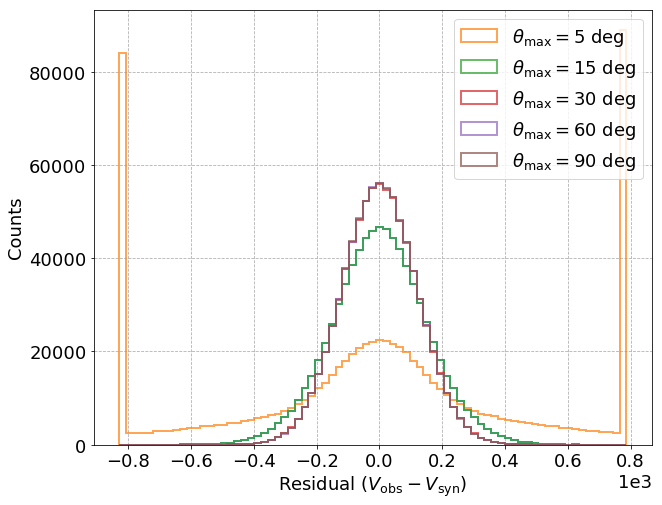

In [59]:
#n, bins, patches = plt.hist(df["res_Th_5"], bins=100, alpha=0.7, histtype='step', linewidth=2,\
#                           label=r"$\theta_{\mathrm{max}}=$"+f"{5} deg");
n, bins, patches = plt.hist(df["res_Th_15"], bins=75, alpha=0.7, histtype='step', linewidth=2,)#\
                           #label=r"$\theta_{\mathrm{max}}=$"+f"{15} deg");

max_b = bins.max()
min_b = bins.min()

#for max_theta, tstr in zip(max_thetas, max_thetas_deg_string):
for tstr in max_thetas_deg_string:
    #plt.hist(df[f"res_Th_{tstr}"], bins=bins, alpha=0.7, histtype='step', linewidth=2,\
    plt.hist(np.clip(df[f"res_Th_{tstr}"], min_b, max_b), bins=bins, alpha=0.7, histtype='step', linewidth=2,\
             label=r"$\theta_{\mathrm{max}}=$"+f"{tstr} deg");

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0));

plt.xlabel(r'Residual ($V_{\mathrm{obs}} - V_{\mathrm{syn}}$)')
plt.ylabel("Counts")

#plt.yscale('log')

plt.legend();

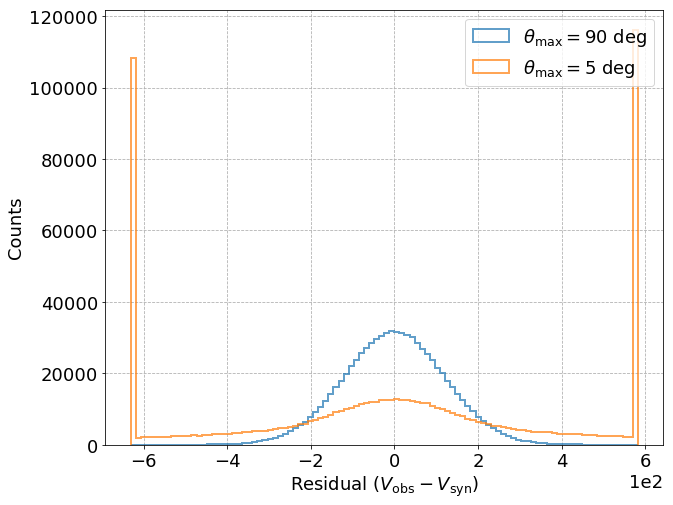

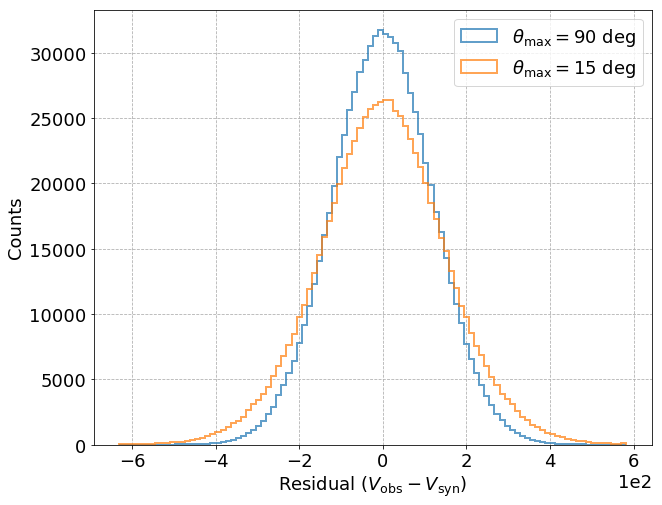

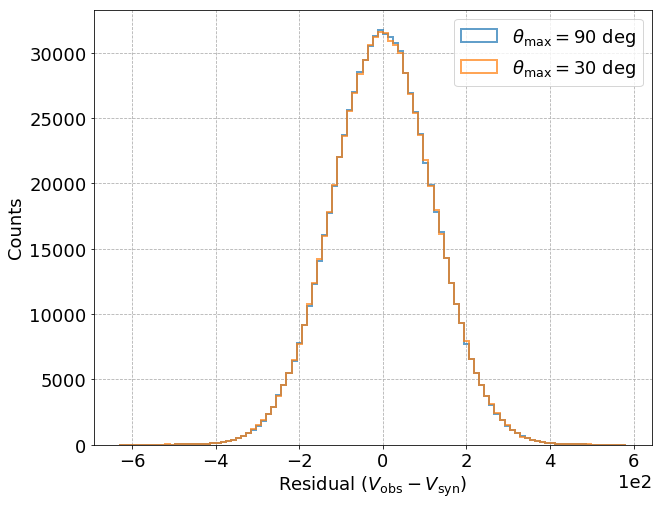

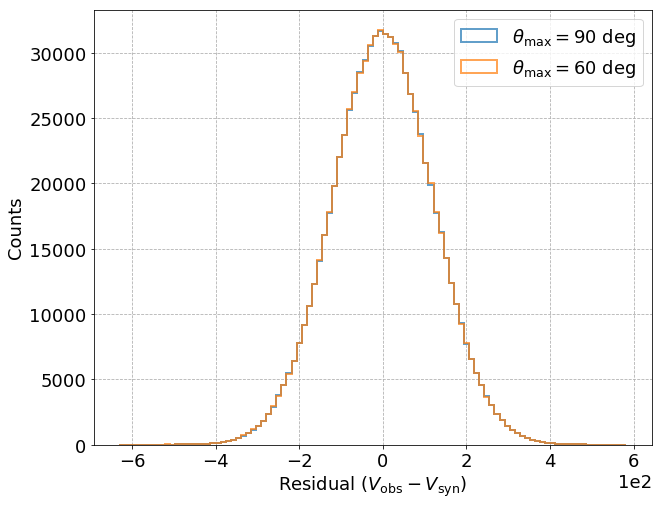

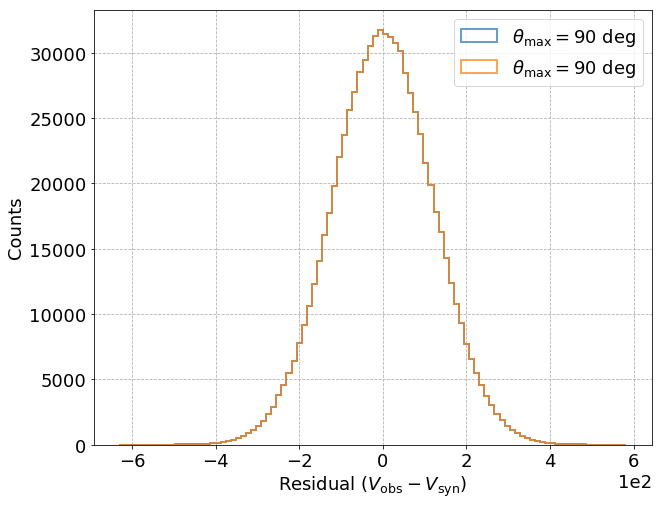

In [60]:
for tstr in max_thetas_deg_string:
    fig = plt.figure()
    tstr1 = '90' #tstr
    n, bins, patches = plt.hist(df[f"res_Th_{tstr1}"], bins=100, alpha=0.7, histtype='step', linewidth=2,\
                               label=r"$\theta_{\mathrm{max}}=$"+f"{tstr1} deg");

    max_b = bins.max()
    min_b = bins.min()

    #for max_theta, tstr in zip(max_thetas, max_thetas_deg_string):
    #for tstr in max_thetas_deg_string:
        #plt.hist(df[f"res_Th_{tstr}"], bins=bins, alpha=0.7, histtype='step', linewidth=2,\
    tstr2 = tstr #'15' # tstr
    plt.hist(np.clip(df[f"res_Th_{tstr2}"], min_b, max_b), bins=bins, alpha=0.7, histtype='step', linewidth=2,\
             label=r"$\theta_{\mathrm{max}}=$"+f"{tstr2} deg");

    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0));

    plt.xlabel(r'Residual ($V_{\mathrm{obs}} - V_{\mathrm{syn}}$)')
    plt.ylabel("Counts")

    #plt.yscale('log')

    plt.legend();

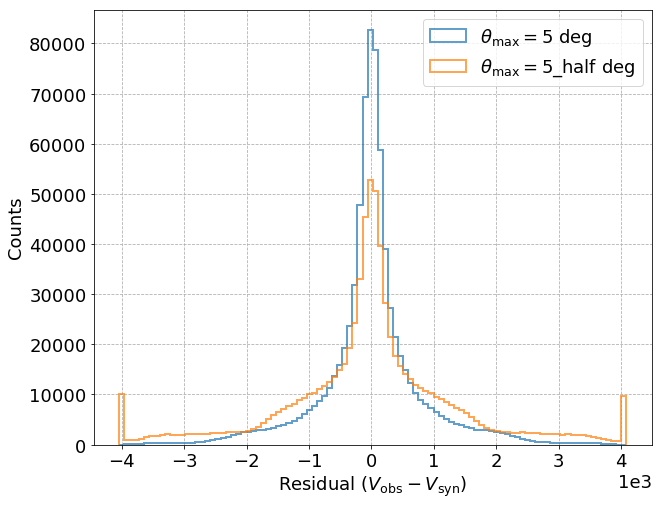

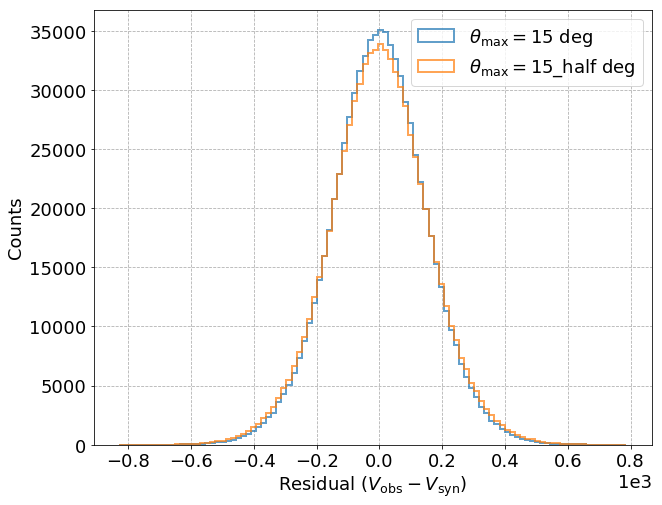

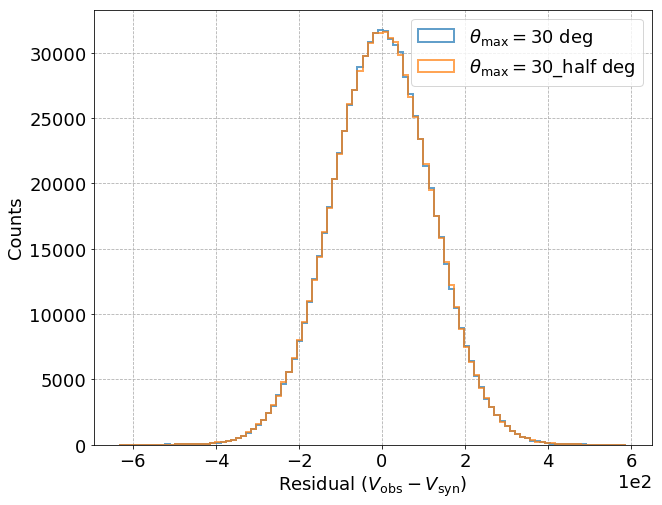

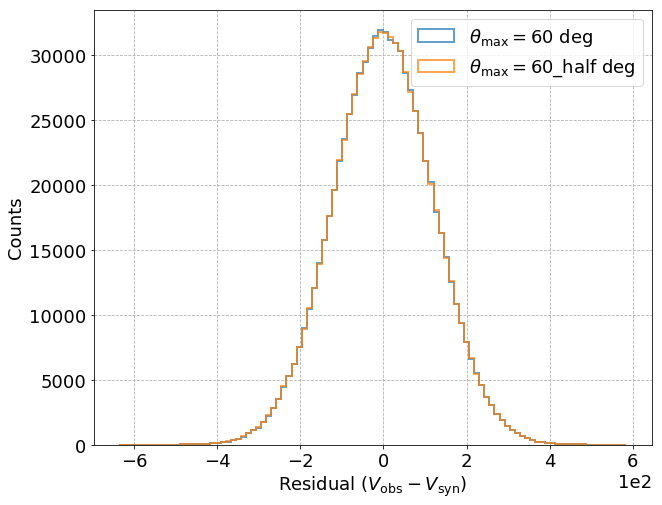

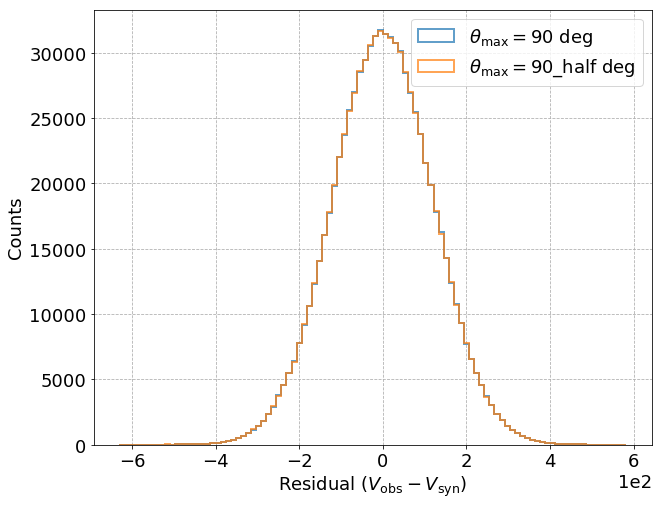

In [61]:
# compare theta half vs. no half
for tstr in max_thetas_deg_string:
    fig = plt.figure()
    tstr1 = tstr#+"_half"
    n, bins, patches = plt.hist(df[f"res_Th_{tstr1}"], bins=100, alpha=0.7, histtype='step', linewidth=2,\
                               label=r"$\theta_{\mathrm{max}}=$"+f"{tstr1} deg");

    max_b = bins.max()
    min_b = bins.min()

    #for max_theta, tstr in zip(max_thetas, max_thetas_deg_string):
    #for tstr in max_thetas_deg_string:
        #plt.hist(df[f"res_Th_{tstr}"], bins=bins, alpha=0.7, histtype='step', linewidth=2,\
    tstr2 = tstr+"_half" #'15' # tstr
    #print(tstr1, tstr2)
    plt.hist(np.clip(df[f"res_Th_{tstr2}"], min_b, max_b), bins=bins, alpha=0.7, histtype='step', linewidth=2,\
             label=r"$\theta_{\mathrm{max}}=$"+f"{tstr2} deg");

    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0));

    plt.xlabel(r'Residual ($V_{\mathrm{obs}} - V_{\mathrm{syn}}$)')
    plt.ylabel("Counts")

    #plt.yscale('log')

    plt.legend();

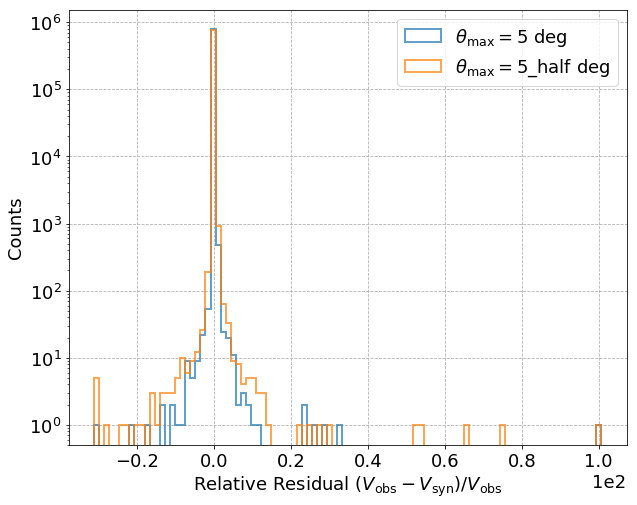

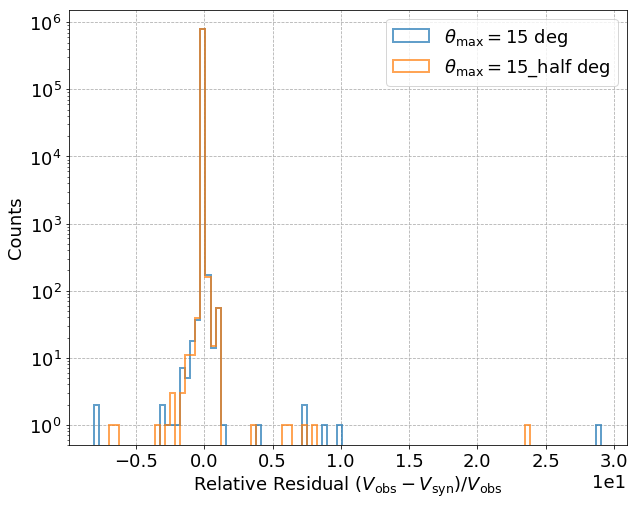

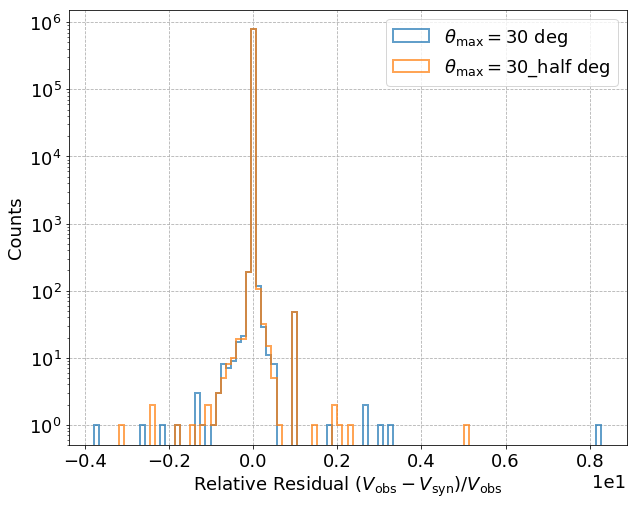

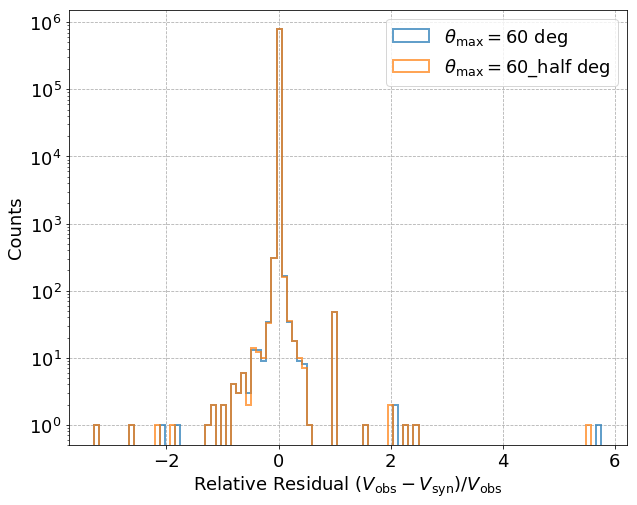

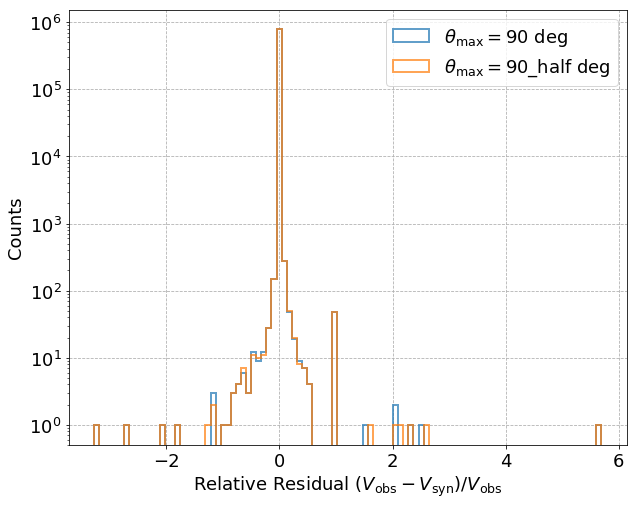

In [63]:
# compare theta half vs. no half
for tstr in max_thetas_deg_string:
    fig = plt.figure()
    tstr1 = tstr#+"_half"
    n, bins, patches = plt.hist(df[f"res_rel_Th_{tstr1}"], bins=100, alpha=0.7, histtype='step', linewidth=2,\
                               label=r"$\theta_{\mathrm{max}}=$"+f"{tstr1} deg");

    max_b = bins.max()
    min_b = bins.min()

    #for max_theta, tstr in zip(max_thetas, max_thetas_deg_string):
    #for tstr in max_thetas_deg_string:
        #plt.hist(df[f"res_Th_{tstr}"], bins=bins, alpha=0.7, histtype='step', linewidth=2,\
    tstr2 = tstr+"_half" #'15' # tstr
    #print(tstr1, tstr2)
    plt.hist(np.clip(df[f"res_rel_Th_{tstr2}"], min_b, max_b), bins=bins, alpha=0.7, histtype='step', linewidth=2,\
             label=r"$\theta_{\mathrm{max}}=$"+f"{tstr2} deg");

    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0));

    plt.xlabel(r'Relative Residual $(V_{\mathrm{obs}} - V_{\mathrm{syn}})/V_{\mathrm{obs}}$')
    plt.ylabel("Counts")

    plt.yscale('log')

    plt.legend();

In [ ]:
for tstr in max_thetas_deg_string:
    tstr1 = tstr+"_half"
    tstr2 = tstr#+"_half"
    print(df[f"res_Th_{tstr1}"].describe())
    print()
    print(df[f"res_Th_{tstr2}"].describe())
    print()

In [ ]:
bins.min()

In [ ]:
bins.max()

In [ ]:
tstr="5"
np.clip(df[f"res_Th_{tstr}"], bins.min(), bins.max())